# Introduction au C# 9.0

## Compilateur C#, CIL et le CLR

- Contrairement au C++, le code C# n’est pas compilé directement en « code machine » (binary code – x86, x64, etc.)
- Les compilateurs C# (csc.exe, Roslyn) compilent le code en un langage intermédiaire appelé CIL (Common Intermediate Language)
  - ~~MSIL (Microsoft Intermediate Language)~~
- Le code CIL ne peut pas être exécuté directement; il doit être premièrement converti en « code machine »
- Le CLR (Common Language Runtime) s’occupe de convertir le code CIL en « code machine »
- Le CLR s’occupe également de la gestion de mémoire, certaines vérifications de sécurité ainsi que la gestion des fils d’exécutions

---

![alt text](compilateurs-et-cil.png)

---
![alt text](dotnet-standard.png)

---
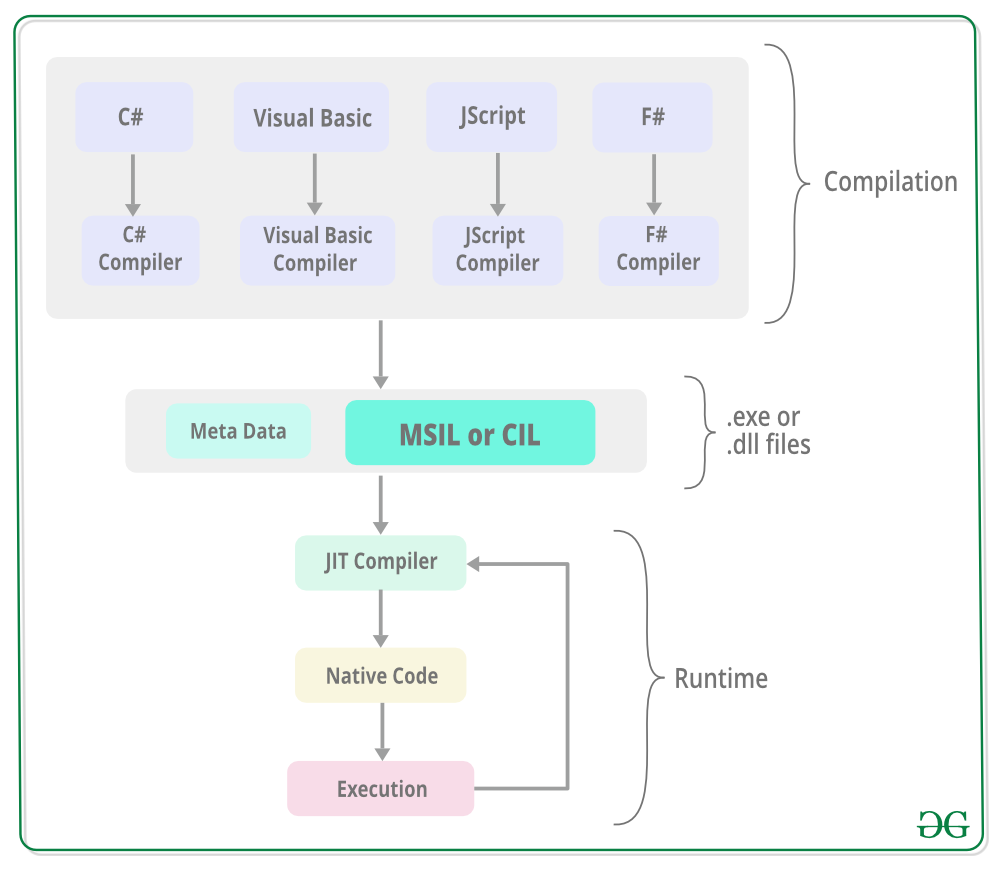

---

https://en.wikipedia.org/wiki/List_of_CLI_languages


### Exemples

---

```csharp
// ===========================================================================
// MyApplication.cs
// ===========================================================================
using System;
using System.Collections.Generic;
using System.Linq;

public class Program
{
  public static void Main()
  {
      Console.WriteLine("Bonjour le monde!");
  }
}

```

---

#### .NET Framework (x86 et x64)

```bash
ls C:\Windows\Microsoft.NET\Framework\v4.0.30319
ls C:\Windows\Microsoft.NET\Framework64\v4.0.30319

# Exemple
C:\Windows\Microsoft.NET\Framework\v4.0.30319\csc.exe /t:exe /out:MyApplication.exe MyApplication.cs
```
---

#### .NET (anciennement *.NET Core*)

```bash
dotnet new console
dotnet build
dotnet run
```

https://github.com/dnSpy/dnSpy

## Les types

 > Tout en .NET est fortement typé, contrairement au JavaScript (ECMAScript).

### Types intégrés

https://docs.microsoft.com/fr-ca/dotnet/csharp/language-reference/builtin-types/built-in-types

### L’objet `System.Type`

Le type d’un objet (représenté par un `System.Type`) peut être déterminé en appelant la méthode membre `GetType()`

- Il est important de vérifier si l’objet est null avant d’appeler la méthode

In [45]:
string x1 = null;
//x1.GetType();

string x2 = "Bonjour!";
Type leType = x2.GetType();

Console.WriteLine(leType.FullName);
Console.WriteLine(leType.Name);

System.String
String


Un objet `System.Type` représentant un type peut être retourné en utilisant l’expression `typeof()`

In [46]:
Type leType = typeof(DateTime);

Console.WriteLine(leType.FullName);
Console.WriteLine(leType.Name);

System.DateTime
DateTime


L’expression `nameof` retourne le nom d’une variable, d’un type ou d’un membre en tant que `string`.

https://docs.microsoft.com/fr-ca/dotnet/csharp/language-reference/operators/nameof

In [3]:
public class Personne
{
    public string Prenom { get; set; }
}

string s1 = nameof(Personne);
string s2 = nameof(Personne.Prenom);

Console.WriteLine(s1);
Console.WriteLine(s2);

Personne
Prenom


### Valeurs par défaut des types fondamentaux

Valeurs par défaut:
- Valeur booléen : `false`
- Valeur numérique : `0` (ou `0.0`)
- Un objet de type `char` : `\0` (caractère ascii 0)
- Tout autre « `object` » et `string` : `null`

#### Type aux valeurs numériques
- `MaxValue` retourne la valeur maximale que supporte le type
- `MinValue` retourne la valeur minimale que supporte le type

#### **`Char`**

- `IsDigit()` indique si le caractère est un chiffre décimal
- `IsLetter()` indique si le caractère est une lettre Unicode
- `IsWhiteSpace()` indique si le caractère représente de l’espace blanche (ex.: espace, tab, nouvelle ligne, etc.)
- `IsPunctuation()` indique si le caractère représente un signe de ponctuation

In [79]:
var tableau = new char [] {'2', 'A', '\t', '!'};

foreach(char c in tableau)
{
    Console.WriteLine($"\n'{ c }'            (valeur numérique: {(int)c})");    
    Console.WriteLine($"IsDigit:       {char.IsDigit(c)}");
    Console.WriteLine($"IsLetter:      {char.IsLetter(c)}");
    Console.WriteLine($"IsWhiteSpace:  {char.IsWhiteSpace(c)}");
    Console.WriteLine($"IsPunctuation: {char.IsPunctuation(c)}");
}


'2'            (valeur numérique: 50)
IsDigit:       True
IsLetter:      False
IsWhiteSpace:  False
IsPunctuation: False

'A'            (valeur numérique: 65)
IsDigit:       False
IsLetter:      True
IsWhiteSpace:  False
IsPunctuation: False

'	'            (valeur numérique: 9)
IsDigit:       False
IsLetter:      False
IsWhiteSpace:  True
IsPunctuation: False

'!'            (valeur numérique: 33)
IsDigit:       False
IsLetter:      False
IsWhiteSpace:  False
IsPunctuation: True


## Variables

Une variable peut être définie de deux manières:

1. explicitement
1. implicitement

Peu importe si la variable est explicite ou implicite, elle est quand même considérée une variable typé (strongly typed).

### Explicite

Pour déclarer une variable explicite, il suffit d’utiliser le type désiré (sur une nouvelle ligne), suivi d’un espace et le nom de la variable.

Une valeur peut également être spécifiée sur la même ligne en ajoutant l’opérateur d’affectation (=) suivi d’une valeur.

 > NOTE: Comme avec Java, toute expression en C# doit terminer avec un point virgule.
 
### Implicite

Pour déclarer une variable implicite, il suffit d’utiliser le mot clé « `var` » (sur une nouvelle ligne) suivi d’un espace et le nom de la variable.

Une valeur **DOIT** être spécifiée sur la même ligne en ajoutant l’opérateur d’affectation (`=`) suivi de la valeur.

- La valeur peut être `null` si une conversion explicite est utilisée.

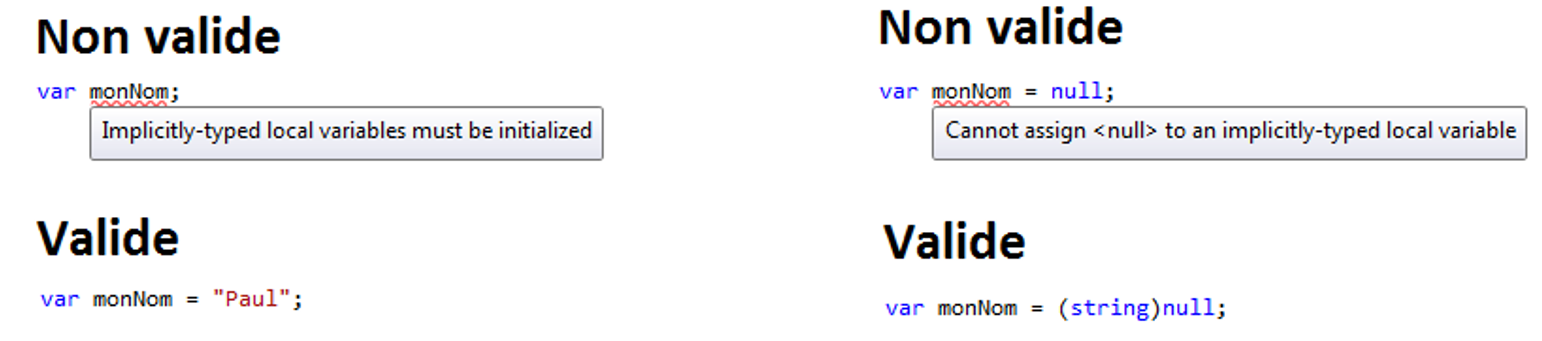

In [2]:
string nom = "Bourgouin";
var prenom = "Alice";

Console.WriteLine(nom.GetType().Name);
Console.WriteLine(prenom.GetType().Name);

String
String
